In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sci
from scipy.stats import ttest_ind
import seaborn as sns

In [2]:
wine_data = pd.read_csv('winemag-data_first150k.csv', sep = ',', encoding = 'utf-8', header = 0 )

In [3]:
df = pd.read_csv('winemag-data-130k-v2.csv', sep = ',', encoding = 'utf-8', header = 0)

In [4]:
wine_data = wine_data.append(df, ignore_index = True)

C:\Users\Public\Documents\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [5]:
print(wine_data)

        Unnamed: 0      country  \
0                0           US   
1                1        Spain   
2                2           US   
3                3           US   
4                4       France   
5                5        Spain   
6                6        Spain   
7                7        Spain   
8                8           US   
9                9           US   
10              10        Italy   
11              11           US   
12              12           US   
13              13       France   
14              14           US   
15              15           US   
16              16           US   
17              17        Spain   
18              18       France   
19              19           US   
20              20           US   
21              21        Spain   
22              22        Spain   
23              23           US   
24              24           US   
25              25  New Zealand   
26              26           US   
27              27  

In [6]:
wine_data['country'].value_counts()
print(wine_data['country'].isnull().value_counts())
wine_data['country'].fillna(value = "unknown", inplace = True)
print()
print(wine_data['country'].isnull().value_counts())

False    280833
True         68
Name: country, dtype: int64

False    280901
Name: country, dtype: int64


In [7]:
print(wine_data['taster_name'].value_counts())
print()
print(wine_data['taster_name'].isnull().value_counts())
wine_data['taster_name'].fillna(value = "anonymous", inplace = True)
print(wine_data['taster_name'].isnull().value_counts())
wine_data['taster_name'].value_counts()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

True     177174
False    103727
Name: taster_name, dtype: int64
False    280901
Name: taster_name, dtype: int64


anonymous             177174
Roger Voss             25514
Michael Schachner      15134
Kerin O’Keefe          10776
Virginie Boone          9537
Paul Gregutt            9532
Matt Kettmann           6332
Joe Czerwinski          5147
Sean P. Sullivan        4966
Anna Lee C. Iijima      4415
Jim Gordon              4177
Anne Krebiehl MW        3685
Lauren Buzzeo           1835
Susan Kostrzewa         1085
Mike DeSimone            514
Jeff Jenssen             491
Alexander Peartree       415
Carrie Dykes             139
Fiona Adams               27
Christina Pickard          6
Name: taster_name, dtype: int64

In [8]:
print(wine_data['taster_twitter_handle'].value_counts())
print()
print(wine_data['taster_twitter_handle'].isnull().value_counts())
wine_data['taster_twitter_handle'].fillna(value = "anonymous", inplace = True)
print(wine_data['taster_twitter_handle'].value_counts())

@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1005
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

True     182143
False     98758
Name: taster_twitter_handle, dtype: int64
anonymous           182143
@vossroger           25514
@wineschach          15134
@kerinokeefe         10776
@vboone               9537
@paulgwine            9532
@mattkettmann         6332
@JoeCz                5147
@wawinereport         4966
@gordone_cellars      4177
@AnneInVino           3685
@laurbuzz             1835
@suskostrzewa         1085
@worldwineguys        1005
@bkfiona                27
@winewchristina          6
Name: taster_twitter_handle, dtype: int64


In [9]:
wine_data['title'].isnull().value_counts()
wine_data['title'].fillna(value = "unknown", inplace = True)
wine_data['title'].isnull().value_counts()
wine_data['variety'].isnull().value_counts()
wine_data['variety'].fillna(value = "unknown", inplace = True)
wine_data['variety'].isnull().value_counts()
wine_data['region_1'].isnull().value_counts()
wine_data['region_1'].fillna(value = "unknown", inplace = True)
wine_data['region_1'].isnull().value_counts()
wine_data['region_2'].isnull().value_counts()
wine_data['region_2'].fillna(value = "unknown", inplace = True)
wine_data['region_2'].isnull().value_counts()
wine_data['points'].isnull().value_counts()
wine_data['price'].isnull().value_counts()
prices = wine_data['price']
mean = round(np.mean(prices))
print(mean)
wine_data['price'].fillna(value = mean, inplace = True)
wine_data['price'].value_counts()
wine_data['province'].isnull().value_counts()
wine_data['province'].value_counts()
wine_data['province'].fillna(value = "unknown", inplace = True)
wine_data['province'].isnull().value_counts()
wine_data['description'].isnull().value_counts()
print(wine_data['designation'].isnull().value_counts())
wine_data['designation'].fillna(value = "unknown", inplace = True)
print(wine_data['designation'].isnull().value_counts())
print(wine_data['winery'].isnull().value_counts())

34
False    197701
True      83200
Name: designation, dtype: int64
False    280901
Name: designation, dtype: int64
False    280901
Name: winery, dtype: int64


C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


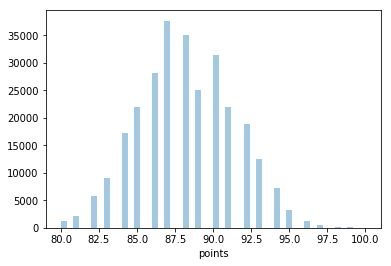

In [10]:
sns.distplot(wine_data.points, kde=False)
plt.show()

In [11]:
# Looking at the statistics for points
wine_data['points'].describe()

count    280901.000000
mean         88.146934
std           3.151528
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [12]:
# Looking at the statistics for price
wine_data['price'].describe()

count    280901.000000
mean         34.162851
std          37.019385
min           4.000000
25%          17.000000
50%          27.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

In [13]:
wine_data['taster_name'].value_counts()

anonymous             177174
Roger Voss             25514
Michael Schachner      15134
Kerin O’Keefe          10776
Virginie Boone          9537
Paul Gregutt            9532
Matt Kettmann           6332
Joe Czerwinski          5147
Sean P. Sullivan        4966
Anna Lee C. Iijima      4415
Jim Gordon              4177
Anne Krebiehl MW        3685
Lauren Buzzeo           1835
Susan Kostrzewa         1085
Mike DeSimone            514
Jeff Jenssen             491
Alexander Peartree       415
Carrie Dykes             139
Fiona Adams               27
Christina Pickard          6
Name: taster_name, dtype: int64

In [14]:
# Clearly shows that the points score is much higher. Should think about changing to a ten point scale
# To over a better understanding of the wines with the higher rating (80 = 0, ..., 100 = 10)
# To give better validality to the ratings
# Looking at the value counts for each variable
wine_data['country'].value_counts()

US                        116901
France                     43191
Italy                      43018
Spain                      14913
Portugal                   11013
Chile                      10288
Argentina                   9431
Australia                   7286
Austria                     6402
New Zealand                 4739
Germany                     4617
South Africa                3659
Greece                      1350
Israel                      1135
Canada                       453
Hungary                      377
Romania                      259
Bulgaria                     218
Uruguay                      201
Slovenia                     181
Croatia                      162
Turkey                       142
Mexico                       133
Moldova                      130
Georgia                      129
England                       83
Brazil                        77
Lebanon                       72
unknown                       68
Cyprus                        42
Morocco   

In [15]:
wine_data['designation'].value_counts()

unknown                                    83200
Reserve                                     4761
Reserva                                     3069
Estate                                      2893
Barrel sample                               1701
Riserva                                     1452
Brut                                        1137
Estate Grown                                1070
Barrel Sample                                891
Crianza                                      846
Dry                                          787
Estate Bottled                               738
Gran Reserva                                 591
Old Vine                                     552
Vieilles Vignes                              533
Brut Rosé                                    524
Extra Dry                                    448
Tradition                                    379
Rosé                                         346
Réserve                                      319
Bien Nacido Vineyard

In [16]:
wine_data['province'].value_counts()

California                                80755
Washington                                18389
Tuscany                                   13178
Bordeaux                                  12052
Oregon                                     9962
Northern Spain                             8743
Burgundy                                   8288
Mendoza Province                           8006
Piedmont                                   7822
Veneto                                     6678
New York                                   5116
South Australia                            4353
Sicily & Sardinia                          4342
Northeastern Italy                         4120
Alsace                                     4120
Loire Valley                               3642
Southwest France                           3104
Champagne                                  2983
Southern Italy                             2788
Central Italy                              2763
Catalonia                               

In [17]:
wine_data.groupby('province').count()

,Unnamed: 0,country,description,designation,points,price,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
province,,,,,,,,,,,,,
Achaia,7,7,7,7,7,7,7,7,7,7,7,7,7
Aconcagua Costa,32,32,32,32,32,32,32,32,32,32,32,32,32
Aconcagua Valley,310,310,310,310,310,310,310,310,310,310,310,310,310
Aegean,38,38,38,38,38,38,38,38,38,38,38,38,38
Agioritikos,3,3,3,3,3,3,3,3,3,3,3,3,3
Ahr,14,14,14,14,14,14,14,14,14,14,14,14,14
Aigialias Slopes,2,2,2,2,2,2,2,2,2,2,2,2,2
Alenquer,14,14,14,14,14,14,14,14,14,14,14,14,14
Alentejano,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809


In [18]:
wine_data['points'] = (wine_data['points'] - 80)/2

In [19]:
winery_df = wine_data.groupby('winery').mean()

In [20]:
variety_df = wine_data.groupby('variety').mean()

In [21]:
print(variety_df)

                           Unnamed: 0    points      price
variety                                                   
Abouriou                 91176.666667  3.833333  35.000000
Agiorgitiko              78795.748634  3.008197  21.010929
Aglianico                64348.621302  4.466716  35.807692
Aidani                   44949.500000  1.000000  27.000000
Airen                    68056.777778  0.722222   8.888889
Albana                   68138.375000  4.875000  28.975000
Albanello                 3786.000000  3.000000  20.000000
Albariño                 71826.490138  3.767258  20.740631
Albarossa                72435.666667  4.000000  40.000000
Albarín                  23601.000000  2.000000  15.000000
Aleatico                 64900.750000  3.000000  37.875000
Alfrocheiro              66432.500000  4.411765  25.205882
Alicante                 68977.133333  3.666667  23.866667
Alicante Bouschet        62161.054348  4.364130  30.771739
Aligoté                  71220.650000  3.066667  18.9833

In [22]:
print(winery_df)

                         Unnamed: 0    points       price
winery                                                   
'37 Cellars            89511.000000  4.000000   34.000000
1+1=3                  89952.375000  2.437500   16.750000
10 Knots               87175.150000  2.075000   23.350000
100 Percent Wine       77968.000000  3.166667   18.000000
1000 Stories           37633.666667  5.166667   19.000000
1040FU                127243.000000  1.000000   25.000000
1070 Green             78785.500000  4.000000   25.000000
10Span                 63662.166667  1.666667   13.000000
12 Linajes             78383.200000  4.366667   26.733333
12C Wines              61609.000000  6.333333   93.000000
13 Celsius             83597.000000  3.500000   15.000000
14 Hands               51100.505882  3.729412   18.635294
16X20                  85468.500000  2.750000   40.000000
1752 Signature Wines   67141.000000  4.000000   20.000000
1789 Wines             98968.500000  5.500000   48.000000
181           

In [23]:
variety_df = variety_df.drop(columns = ['Unnamed: 0'])

In [24]:
winery_df_points = winery_df.sort_values(by=['points'], ascending = False)
winery_df_price = winery_df.sort_values(by=['price'], ascending = False)
variety_df_points = variety_df.sort_values(by=['points'], ascending = False)
variety_df_price = variety_df.sort_values(by=['price'], ascending = False)

In [25]:
print(variety_df_points)

                             points       price
variety                                        
Tinta del Pais             7.500000   47.500000
Terrantez                  7.500000  236.000000
Riesling-Chardonnay        7.000000   40.000000
Blauburgunder              6.500000   19.000000
Ramisco                    6.500000  495.000000
Garnacha-Cariñena          6.500000   57.000000
Sirica                     6.375000   29.750000
Cabernet-Shiraz            6.333333  105.666667
Bual                       6.272727   70.000000
Tokay                      6.270833   71.875000
Rosenmuskateller           6.250000   92.000000
Roviello                   6.250000   31.000000
Muscadel                   6.227273  131.181818
Sercial                    6.166667   35.000000
Kotsifali                  6.000000   13.000000
Babosa Negro               6.000000   45.000000
Moscato di Noto            6.000000   40.000000
Pignolo                    6.000000   70.000000
Sauvignon Blanc-Assyrtiko  6.000000   20

In [26]:
print(variety_df_price)

                                      points       price
variety                                                 
Ramisco                             6.500000  495.000000
Terrantez                           7.500000  236.000000
Francisa                            5.500000  160.000000
Muscadel                            6.227273  131.181818
Malbec-Cabernet                     5.833333  113.333333
Cabernet-Shiraz                     6.333333  105.666667
Muscadelle                          5.961538   96.769231
Rosenmuskateller                    6.250000   92.000000
Mazuelo                             3.916667   85.000000
Debit                               3.722222   81.000000
Tinto Fino                          4.945714   72.337143
Tokay                               6.270833   71.875000
Pignolo                             6.000000   70.000000
Bual                                6.272727   70.000000
Mission                             5.000000   68.000000
Champagne Blend                

In [27]:
wine_data.to_csv('winedata.csv', sep=',', encoding='utf-8')

In [28]:
print(winery_df_points)

                                 Unnamed: 0     points       price
winery                                                            
Sloan                         128897.000000  10.000000  245.000000
Gandona                       106165.500000   8.500000  190.000000
Ovid                          106165.000000   8.500000  195.000000
Château Climens                75371.615385   8.346154   98.153846
Araujo                         99884.333333   8.333333  215.000000
Château Pétrus                 78867.562500   8.312500  311.000000
Château d'Yquem                95589.636364   8.272727  103.636364
Cardinale                      96050.600000   8.250000  220.000000
Domaine des Lambrays           81644.400000   8.200000   70.200000
Au Sommet                      80486.600000   8.200000  250.000000
Salon                          86139.583333   8.083333  360.666667
Tenuta dell'Ornellaia          67754.744186   8.034884  249.976744
D'Alfonso-Curran              116147.000000   8.000000   65.00

In [29]:
#wine_data.loc[wine_data['variety'] == 'Cabernet-Shiraz']

In [30]:
# Looking at wineries that are the best option in regards to the points given to wines
# Looking at Van Ruiten because it dropes the variety score of Cabernet-Shiraz
#wine_data.loc[wine_data['winery'] == 'Van Ruiten']

In [31]:
#wine_data.loc[wine_data['winery'] == 'Hickinbotham']

In [32]:
counts_df = wine_data.groupby('variety').count()

In [33]:
counts_df = counts_df.sort_values(by=['points'], ascending = False)

In [34]:
list_variety = counts_df.index.tolist()

In [35]:
print(counts_df)

                               Unnamed: 0  country  description  designation  \
variety                                                                        
Pinot Noir                          27563    27563        27563        27563   
Chardonnay                          26235    26235        26235        26235   
Cabernet Sauvignon                  22272    22272        22272        22272   
Red Blend                           19008    19008        19008        19008   
Bordeaux-style Red Blend            14262    14262        14262        14262   
Sauvignon Blanc                     11287    11287        11287        11287   
Riesling                            10713    10713        10713        10713   
Syrah                                9967     9967         9967         9967   
Merlot                               8172     8172         8172         8172   
Zinfandel                            6513     6513         6513         6513   
Rosé                                 638

In [36]:
#variety_df_points.append(counts_df['points'], ignore_index = True)

In [37]:
#variety_df_points.loc[variety_df_points.name == 'Pinot Noir']
#print(variety_df_points.iloc[0].Name)
all_variety = variety_df_points.loc[list_variety]
print(all_variety)

                                 points       price
variety                                            
Pinot Noir                     4.526322   45.262453
Chardonnay                     4.006289   33.300133
Cabernet Sauvignon             4.152299   44.509474
Red Blend                      4.106324   35.606166
Bordeaux-style Red Blend       4.646052   43.778713
Sauvignon Blanc                3.548419   19.912288
Riesling                       4.470083   30.941940
Syrah                          4.377446   37.647437
Merlot                         3.383933   28.259545
Zinfandel                      3.575618   27.917550
Rosé                           3.351042   19.759442
Sangiovese                     4.107816   39.484303
Malbec                         3.822355   27.791809
White Blend                    3.578125   23.719715
Nebbiolo                       5.176710   58.426561
Portuguese Red                 4.358607   25.757796
Tempranillo                    3.517064   30.495190
Sparkling Bl

In [38]:
all_variety.loc[all_variety['points'] >= 4.6]

,points,price
variety,,
Bordeaux-style Red Blend,4.646052,43.778713
Nebbiolo,5.176710,58.426561
Champagne Blend,4.911352,67.887244
Grüner Veltliner,4.828027,29.024298
Sangiovese Grosso,5.193610,54.787315
Blaufränkisch,4.842048,30.967320
Sagrantino,4.799539,48.838710
Sherry,4.741379,31.630542
St. Laurent,4.605670,32.551546


In [39]:
top_bsrd = wine_data.loc[wine_data['variety'] == 'Bordeaux-style Red Blend']
top_pinot = wine_data.loc[wine_data['variety'] == 'Pinot Noir']
top_riesling = wine_data.loc[wine_data['variety'] == 'Riesling']
top_gruner =  wine_data.loc[wine_data['variety'] == 'Grüner Veltliner']
top_corniva = wine_data.loc[wine_data['variety'] == 'Syrah']

In [40]:
all_variety.sort_values(by=['points'], ascending = False)

,points,price
variety,,
Tinta del Pais,7.500000,47.500000
Terrantez,7.500000,236.000000
Riesling-Chardonnay,7.000000,40.000000
Ramisco,6.500000,495.000000
Garnacha-Cariñena,6.500000,57.000000
Blauburgunder,6.500000,19.000000
Sirica,6.375000,29.750000
Cabernet-Shiraz,6.333333,105.666667
Bual,6.272727,70.000000


In [41]:
not_top_bsrd = wine_data.loc[wine_data['variety'] != 'Bordeaux-style Red Blend']
not_top_pinot = wine_data.loc[wine_data['variety'] != 'Pinot Noir']
not_not_top_riesling = wine_data.loc[wine_data['variety'] != 'Riesling']
not_top_gruner =  wine_data.loc[wine_data['variety'] != 'Grüner Veltliner']
not_top_corniva = wine_data.loc[wine_data['variety'] != 'Syrah']

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


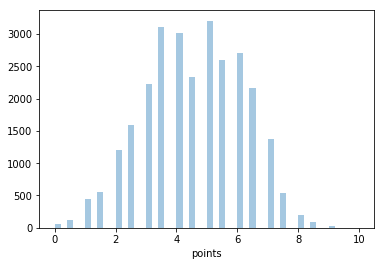

In [42]:
sns.distplot(top_pinot.points, kde=False)
plt.show()

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


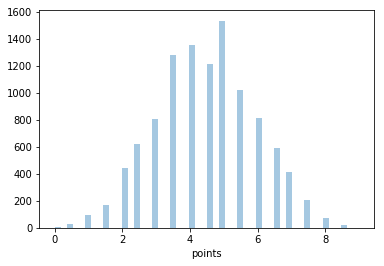

In [43]:
sns.distplot(top_riesling.points, kde=False)
plt.show()

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


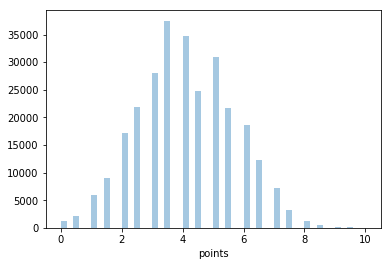

In [44]:
sns.distplot(not_top_gruner.points, kde=False)
plt.show()

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


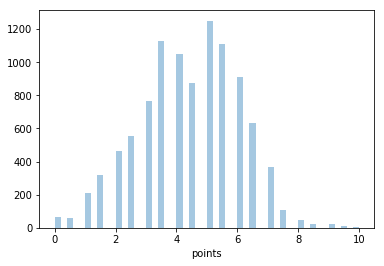

In [45]:
sns.distplot(top_corniva.points, kde=False)
plt.show()

In [46]:
not_top_bsrd.describe()

,Unnamed: 0,points,price
count,266639.000000,266639.000000,266639.000000
mean,70695.255983,4.042841,33.648517
std,41235.358723,1.567915,34.259867
min,0.000000,0.000000,4.000000
25%,35125.500000,3.000000,17.000000
50%,70213.000000,4.000000,26.000000
75%,105435.500000,5.000000,39.000000
max,150929.000000,10.000000,2500.000000


In [47]:
top_bsrd.describe()

,Unnamed: 0,points,price
count,14262.000000,14262.000000,14262.000000
mean,69128.457439,4.646052,43.778713
std,40793.049859,1.612194,70.361547
min,67.000000,0.000000,7.000000
25%,34927.750000,3.500000,25.000000
50%,70403.500000,4.500000,34.000000
75%,102830.500000,6.000000,42.000000
max,150851.000000,10.000000,3300.000000


C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


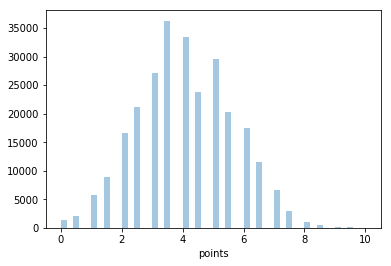

In [48]:
sns.distplot(not_top_bsrd.points, kde=False)
plt.show()

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


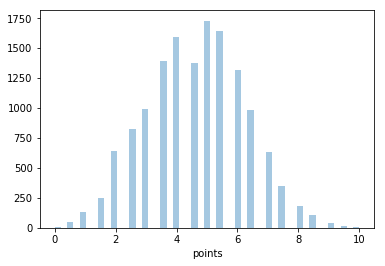

In [49]:
sns.distplot(top_bsrd.points, kde=False)
plt.show()

In [50]:
ttest_ind(not_top_bsrd['points'], top_bsrd['points'])

Ttest_indResult(statistic=-44.69842857586555, pvalue=0.0)

In [51]:
ttest_ind(not_top_pinot['points'], top_pinot['points'])

Ttest_indResult(statistic=-50.46803158117899, pvalue=0.0)

In [52]:
ttest_ind(not_not_top_riesling['points'], top_riesling['points'])

Ttest_indResult(statistic=-26.596436850815145, pvalue=1.1657068848306149e-155)

In [53]:
ttest_ind(not_top_gruner['points'], top_gruner['points'])

Ttest_indResult(statistic=-23.518417262563656, pvalue=3.4727295106333337e-122)

In [54]:
ttest_ind(not_top_corniva['points'],top_corniva['points'])

Ttest_indResult(statistic=-19.623449228005306, pvalue=1.1132623495758911e-85)

In [55]:
#ALL THE TESTS SHOW SIGNIFICANCE & THEY FIT WITHIN THE PRICE POINT WE DETERMINED

In [56]:
#Looking at the largest amount of reviews with the highest average points rating
top_bsrd.sort_values(by=['points'], ascending = False)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
209282,58352,France,"This is a magnificently solid wine, initially ...",unknown,10.0,150.0,Bordeaux,Saint-Julien,unknown,Roger Voss,@vossroger,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
262683,111753,France,"Almost black in color, this stunning wine is g...",unknown,10.0,1500.0,Bordeaux,Pauillac,unknown,Roger Voss,@vossroger,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild
262685,111755,France,This is the finest Cheval Blanc for many years...,unknown,10.0,1500.0,Bordeaux,Saint-Émilion,unknown,Roger Voss,@vossroger,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc
268988,118058,US,This wine dazzles with perfection. Sourced fro...,La Muse,10.0,450.0,California,Sonoma County,Sonoma,anonymous,anonymous,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité
262686,111756,France,"A hugely powerful wine, full of dark, brooding...",unknown,10.0,359.0,Bordeaux,Saint-Julien,unknown,Roger Voss,@vossroger,Château Léoville Las Cases 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Las Cases
262688,111758,France,"Stern, almost severe initially, this great win...",unknown,9.5,34.0,Bordeaux,Pauillac,unknown,Roger Voss,@vossroger,Château Latour 2010 Pauillac,Bordeaux-style Red Blend,Château Latour
267024,116094,France,"98-100 Barrel sample. Sumptuous, opulent, with...",Barrel sample,9.5,34.0,Bordeaux,Margaux,unknown,Roger Voss,@vossroger,Château Palmer 2009 Barrel sample (Margaux),Bordeaux-style Red Blend,Château Palmer
131383,131383,France,"98-100 Barrel sample. Sumptuous, opulent, with...",Barrel sample,9.5,34.0,Bordeaux,Margaux,unknown,anonymous,anonymous,unknown,Bordeaux-style Red Blend,Château Palmer
131385,131385,France,"98-100 Barrel sample. A superb wine, with the ...",Barrel sample,9.5,34.0,Bordeaux,Pauillac,unknown,anonymous,anonymous,unknown,Bordeaux-style Red Blend,Château Pontet-Canet
106485,106485,France,"98-100 Barrel sample. A superb wine, with the ...",Barrel sample,9.5,34.0,Bordeaux,Pauillac,unknown,anonymous,anonymous,unknown,Bordeaux-style Red Blend,Château Pontet-Canet


In [57]:
neutral_reviewers = wine_data.loc[wine_data['taster_name'] == 'Roger Voss']
ms = wine_data.loc[wine_data['taster_name'] == 'Michael Schachner']
kk = wine_data.loc[wine_data['taster_name'] == 'Kerin O\'Keefe']
anon = wine_data.loc[wine_data['taster_name'] == 'anonymous']
neutral_reviewers = neutral_reviewers.append(ms, ignore_index = True)
neutral_reviewers = neutral_reviewers.append(kk,  ignore_index = True)
neutral_reviewers = neutral_reviewers.append(anon,  ignore_index = True)
print(neutral_reviewers)

        Unnamed: 0       country  \
0                1      Portugal   
1                7        France   
2                9        France   
3               11        France   
4               30        France   
5               42        France   
6               49        France   
7               53        France   
8               63        France   
9               65        France   
10              66        France   
11              69        France   
12              79      Portugal   
13              82        France   
14              95        France   
15              96        France   
16             110        France   
17             125  South Africa   
18             132  South Africa   
19             137  South Africa   
20             151      Portugal   
21             157      Portugal   
22             160        France   
23             163        France   
24             166        France   
25             179        France   
26             193        Fr

In [58]:
print(top_corniva)

        Unnamed: 0    country  \
29              29         US   
44              44     France   
65              65         US   
148            148         US   
163            163         US   
181            181         US   
226            226         US   
228            228         US   
285            285         US   
293            293         US   
300            300         US   
319            319         US   
338            338         US   
453            453         US   
495            495   Portugal   
496            496         US   
503            503         US   
523            523         US   
589            589         US   
698            698         US   
766            766      Chile   
768            768         US   
796            796         US   
800            800         US   
837            837         US   
851            851     Canada   
852            852   Bulgaria   
886            886         US   
901            901         US   
904       

In [59]:
neutral_reviewers['variety'].value_counts()

Chardonnay                       20955
Pinot Noir                       19640
Cabernet Sauvignon               17408
Red Blend                        13683
Bordeaux-style Red Blend         12721
Sauvignon Blanc                   9046
Syrah                             7252
Merlot                            6504
Riesling                          6259
Malbec                            5375
Rosé                              5106
Zinfandel                         4933
Portuguese Red                    4678
Sangiovese                        4136
Tempranillo                       4050
White Blend                       4017
Sparkling Blend                   3177
Nebbiolo                          3073
Champagne Blend                   2549
Corvina, Rondinella, Molinara     2301
Bordeaux-style White Blend        2295
Shiraz                            2115
Portuguese White                  2100
Sangiovese Grosso                 2096
Cabernet Franc                    1869
Pinot Grigio             

In [60]:
neutral_t1 = neutral_reviewers.loc[neutral_reviewers['variety'] == 'Bordeaux-style Red Blend']
neutral_t2 = neutral_reviewers.loc[neutral_reviewers['variety'] != 'Bordeaux-style Red Blend']
neutral_t3 = neutral_reviewers.loc[neutral_reviewers['variety'] == 'Pinot Noir']
neutral_t4 = neutral_reviewers.loc[neutral_reviewers['variety'] != 'Pinot Noir']
neutral_t5 = neutral_reviewers.loc[neutral_reviewers['variety'] == 'Riesling']
neutral_t6 = neutral_reviewers.loc[neutral_reviewers['variety'] != 'Riesling']
neutral_t7 = neutral_reviewers.loc[neutral_reviewers['variety'] == 'Grüner Veltliner']
neutral_t8 = neutral_reviewers.loc[neutral_reviewers['variety'] != 'Grüner Veltliner']
neutral_t9 = neutral_reviewers.loc[neutral_reviewers['variety'] == 'Syrah']
neutral_t10 = neutral_reviewers.loc[neutral_reviewers['variety'] != 'Syrah']

In [61]:
neutral_t9.describe()

,Unnamed: 0,points,price
count,7252.000000,7252.000000,7252.000000
mean,76626.337700,4.143202,35.829978
std,42279.668679,1.667902,31.040903
min,29.000000,0.000000,4.000000
25%,40899.500000,3.000000,22.000000
50%,76891.000000,4.000000,30.000000
75%,114323.750000,5.500000,40.000000
max,150612.000000,10.000000,450.000000


In [62]:
neutral_t2.describe()

,Unnamed: 0,points,price
count,205101.000000,205101.000000,205101.000000
mean,72253.706974,3.911351,33.024832
std,42181.098375,1.597132,35.132666
min,0.000000,0.000000,4.000000
25%,35771.000000,3.000000,16.000000
50%,71612.000000,4.000000,25.000000
75%,108176.000000,5.000000,38.000000
max,150929.000000,10.000000,2500.000000


In [63]:
neutral_reviewers.groupby('points').count()

,Unnamed: 0,country,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
points,,,,,,,,,,,,,
0.0,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240
0.5,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067
1.0,5495,5495,5495,5495,5495,5495,5495,5495,5495,5495,5495,5495,5495
1.5,8271,8271,8271,8271,8271,8271,8271,8271,8271,8271,8271,8271,8271
2.0,15492,15492,15492,15492,15492,15492,15492,15492,15492,15492,15492,15492,15492
2.5,18689,18689,18689,18689,18689,18689,18689,18689,18689,18689,18689,18689,18689
3.0,22963,22963,22963,22963,22963,22963,22963,22963,22963,22963,22963,22963,22963
3.5,29969,29969,29969,29969,29969,29969,29969,29969,29969,29969,29969,29969,29969
4.0,25984,25984,25984,25984,25984,25984,25984,25984,25984,25984,25984,25984,25984


In [64]:
neutral_t1.var()

Unnamed: 0    1.686745e+09
points        2.697731e+00
price         5.410448e+03
dtype: float64

In [65]:
neutral_t2.var()

Unnamed: 0    1.779245e+09
points        2.550830e+00
price         1.234304e+03
dtype: float64

The data appears to be approximately normal for both data sets.

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


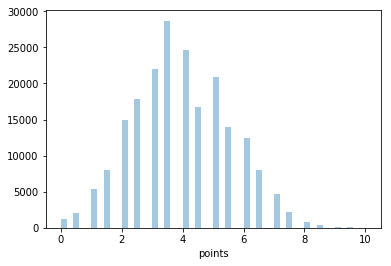

In [66]:
sns.distplot(neutral_t2.points, kde=False)
plt.show()

C:\Users\Public\Documents\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


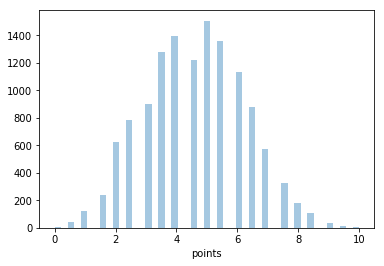

In [67]:
sns.distplot(neutral_t1.points, kde=False)
plt.show()

In [68]:
#cat1 = my_data[my_data['Category']=='cat1']
#cat2 = my_data[my_data['Category']=='cat2']


#Shows that Bordeaux-style Red Blend is significantly different than his other reviews of wine
#Could represent that he is bias of this specific wine. Testing further
ttest_ind(neutral_t2['points'], neutral_t1['points'])


Ttest_indResult(statistic=-48.21553589337764, pvalue=0.0)

The first assumption made regarding t-tests concerns the scale of measurement. The assumption for a t-test is that the scale of measurement applied to the data collected follows a continuous or ordinal scale, such as the scores for an IQ test.

The second assumption made is that of a simple random sample, that the data is collected from a representative, randomly selected portion of the total population.

The third assumption is the data, when plotted, results in a normal distribution, bell-shaped distribution curve.

The fourth assumption is a reasonably large sample size is used. A larger sample size means the distribution of results should approach a normal bell-shaped curve.

The final assumption is homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.

In [69]:
ttest_ind(neutral_t3['points'], neutral_t4['points'])

Ttest_indResult(statistic=38.377403418612985, pvalue=0.0)

In [70]:
ttest_ind(neutral_t5['points'], neutral_t6['points'])

Ttest_indResult(statistic=14.22297549181905, pvalue=6.918969772533111e-46)

In [71]:
ttest_ind(neutral_t7['points'], neutral_t8['points'])

Ttest_indResult(statistic=15.369394429964554, pvalue=2.8011935170754242e-53)

In [72]:
ttest_ind(neutral_t9['points'], neutral_t10['points'])

Ttest_indResult(statistic=10.271644046361608, pvalue=9.58177624407063e-25)

In [73]:
neutral_t1['price'].mean()

42.81227890889081

In [74]:
neutral_t3['price'].mean()

45.731873727087574

In [75]:
neutral_t5['price'].mean()

29.696277360600735

In [76]:
neutral_t7['price'].mean()

29.406164383561645

Determining the mean price for each group given neutral reviewers

In [77]:
neutral_t8['price'].mean()

33.6247030439726

In [78]:
list_values = ['Bordeaux-style Red Blend','Pinot Noir','Riesling','Grüner Veltliner', 'Syrah']
neutral_reviewers = neutral_reviewers[neutral_reviewers['variety'].isin(list_values)]
neutral_reviewers = neutral_reviewers.loc[neutral_reviewers['country'] == 'US']
print(neutral_reviewers)
means_reviews = neutral_reviewers.groupby(['variety','province']).mean()

        Unnamed: 0 country                                        description  \
52             388      US  Delicate and complex, a cool climate wine with...   
26140         5146      US  This blend of Cab Sauvignon, Cab Franc and Mer...   
26259         6030      US  Snappy and full of raspberry and cedar aromas....   
26260         6034      US  A burly surprise from southern Oregon; there a...   
26261         6041      US  Each year Rich gets his grapes from different ...   
26262         6045      US  Bright in color and full of snappy cherries on...   
26263         6051      US  This organic bottling marks Cooper’s 20th year...   
26264         6053      US  Smells like a briar patch under summer sun, wi...   
26265         6054      US  Rustic, with some smoke and char up front that...   
27785        18796      US  Tons of raspberry, vanilla and licorice, backe...   
27786        18798      US  Intense and earthy aromas of perfectly ripe be...   
27787        18803      US  

In [79]:
means_reviews
#means_reviews.sort_values(by=['points'], ascending = False)

Unnamed: 0    points      price
variety                  province                                          
Bordeaux-style Red Blend America          35852.333333  3.666667  36.666667
                         California       75085.797365  4.685383  70.383312
                         Idaho            24132.333333  3.666667  26.666667
                         New York         76916.451220  2.859756  27.707317
                         North Carolina   30763.200000  2.400000  32.200000
                         Oregon           56118.333333  5.527778  42.222222
                         Pennsylvania    149256.000000  3.000000  40.000000
                         Texas           107267.000000  5.000000  32.000000
                         Virginia         69144.964706  3.164706  31.282353
                         Washington       60955.299817  5.124314  42.334552
Grüner Veltliner         California       53273.043478  4.565217  25.130435
                         New York         57029.142857  3.000000  17.000000
                         Oregon           63632.230769  4.153846  21.538462
                         Washington       25813.500000  4.500000  17.500000
Pinot Noir               America          54775.500000  4.500000  46.500000
                         California       70753.469843  4.421248  42.246212
                         Michigan         79996.200000  1.100000  29.200000
                         New Jersey      100506.000000  3.500000  36.000000
                         New Mexico       84076.333333  3.000000  29.000000
                         New York         68041.025424  2.944915  23.338983
                         Oregon           60126.422341  4.470926  41.263581
                         Pennsylvania    101122.000000  2.750000  28.500000
                         Virginia          4494.500000  3.500000  35.000000
                         Washington       69748.571429  2.642857  22.821429
Riesling                 America         123832.000000  2.500000  18.000000
                         Arizona          84697.750000  1.000000  20.500000
                         California       74473.646091  3.358025  17.596708
                         Colorado         12542.000000  3.250000  19.500000
                         Idaho            40585.954545  3.181818  12.090909
                         Michigan         67681.000000  1.863636  17.818182
                         New Jersey      105218.285714  1.357143  14.714286
                         New Mexico       88553.500000  1.500000  10.000000
                         New York         59985.239274  3.500000  19.013201
                         Ohio             86437.800000  2.266667  13.533333
                         Oregon           69082.646739  4.149457  18.711957
                         Texas            99015.000000  1.666667  13.333333
                         Virginia         59391.285714  2.714286  19.285714
                         Washington       74891.433107  4.244898  15.827664
Syrah                    Arizona          85909.500000  3.333333  38.500000
                         California       74765.166760  3.901536  33.335475
                         Colorado         50482.800000  2.600000  25.400000
                         Idaho            50848.000000  3.000000  27.294118
                         Kentucky        126560.000000  1.500000  40.000000
                         Michigan         53486.000000  3.500000  20.000000
                         New Jersey       16237.000000  3.500000  35.000000
                         New Mexico       84269.166667  2.833333  24.000000
                         New York        104619.333333  2.708333  24.083333
                         Ohio            105383.000000  1.000000  15.000000
                         Oregon           66253.006849  4.386986  36.267123
                         Pennsylvania    104351.000000  2.500000  19.000000
                         Virginia         56703.153846  2.076923  29.230769
                

In [83]:
price_point = means_reviews.loc[means_reviews['price'] <= 45]

In [84]:
price_point.sort_values(by=['province'], ascending = False)

,,Unnamed: 0,points,price
variety,province,,,
Syrah,Washington,79387.023948,4.799347,34.251814
Bordeaux-style Red Blend,Washington,60955.299817,5.124314,42.334552
Riesling,Washington,74891.433107,4.244898,15.827664
Pinot Noir,Washington,69748.571429,2.642857,22.821429
Grüner Veltliner,Washington,25813.500000,4.500000,17.500000
Riesling,Virginia,59391.285714,2.714286,19.285714
Syrah,Virginia,56703.153846,2.076923,29.230769
Pinot Noir,Virginia,4494.500000,3.500000,35.000000
Bordeaux-style Red Blend,Virginia,69144.964706,3.164706,31.282353
